Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

Необхідно виконати:

1. Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
2. Прочитайте отриману таблицю, використовуючи метод head
3. Визначте розмір таблиці за допомогою методу shape
4. Визначте типи всіх стовпців за допомогою dataframe.dtypes
5. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
6. Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
7. Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
8. Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
9. Визначте новий розмір таблиці за допомогою методу shape
10. Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
11. Визначте розмір таблиці python_data за допомогою методу shape
12. Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
13. Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
14. Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
15. Створіть описову статистику за допомогою методу describe для нового стовпчика.
16. Збережіть отриману таблицю в CSV файл
Робота здається у вигляді Jupyter файлу Hw2.2.ipynb

In [ ]:
import pandas as pd

# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)

# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
print("Перші 5 рядків таблиці:")
print(df.head())

# Визначте розмір таблиці за допомогою методу shape
print("\nРозмір таблиці:")
print(df.shape)

# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("\nТипи стовпців:")
print(df.dtypes)

# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print("\nЧастка пропусків в кожному стовпці:")
print(df.isnull().sum() / len(df))

# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
df = df.dropna(subset=['Язык.программирования'])

# Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
print("\nЧастка пропусків після видалення:")
print(df.isnull().sum() / len(df))

# Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
df = df.dropna()

# Визначте новий розмір таблиці за допомогою методу shape
print("\nРозмір таблиці після видалення рядків:")
print(df.shape)

# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = df[df['Язык.программирования'] == 'Python']

# Визначте розмір таблиці python_data за допомогою методу shape
print("\nРозмір таблиці python_data:")
print(python_data.shape)

# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
grouped_data = df.groupby('Должность').agg({'Зарплата.в.месяц': ['min', 'max']})


# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(salary_values):
    return salary_values.mean()


# Додавання нового стовпця "avg" з середньою зарплатою
grouped_data['avg'] = grouped_data['Зарплата.в.месяц']['max'].apply(fill_avg_salary)

# Створіть описову статистику за допомогою методу describe для нового стовпчика.
print("\nОписова статистика для стовпчика 'avg':")
print(grouped_data['avg'].describe())

# Збережіть отриману таблицю в CSV файл
df.to_csv('output_file.csv', index=False)



Перші 5 рядків таблиці:
   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 чело

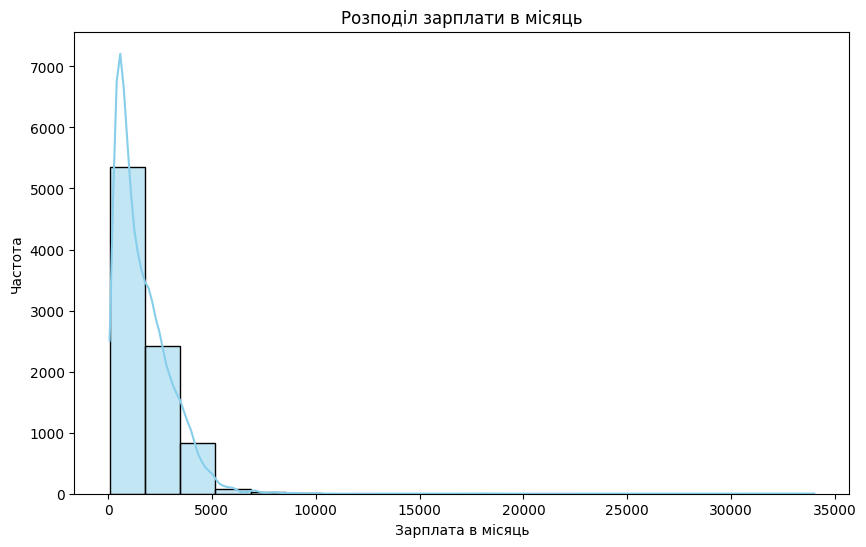

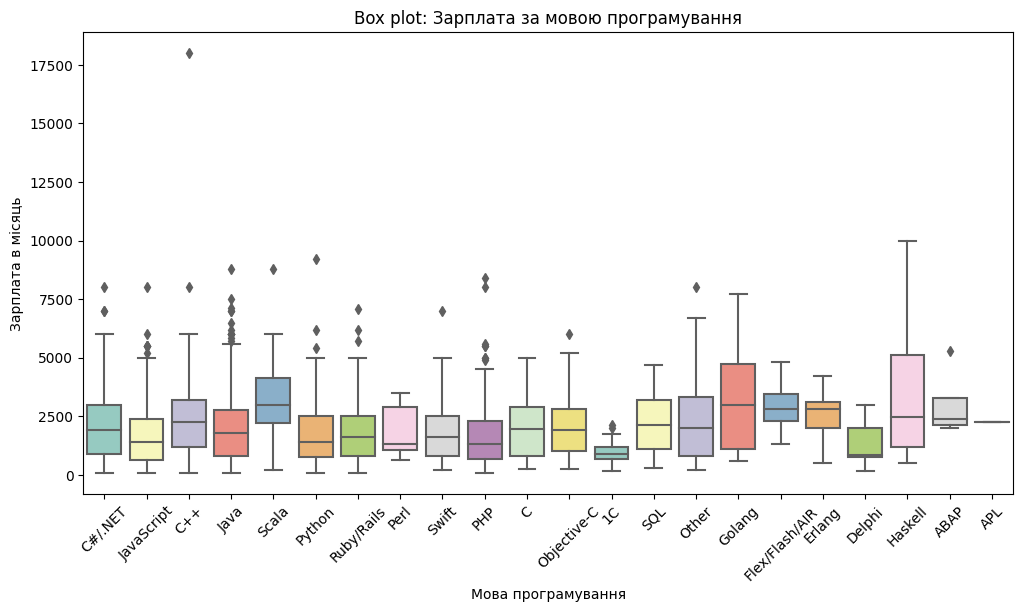

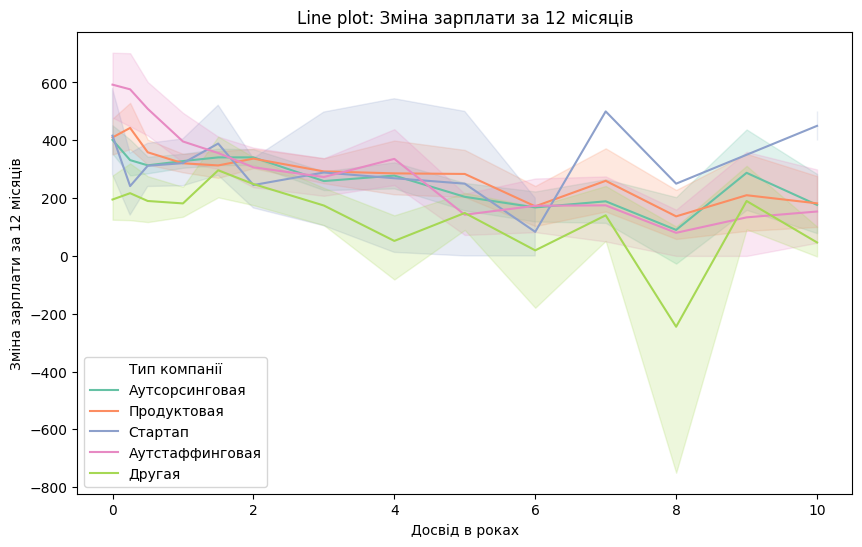

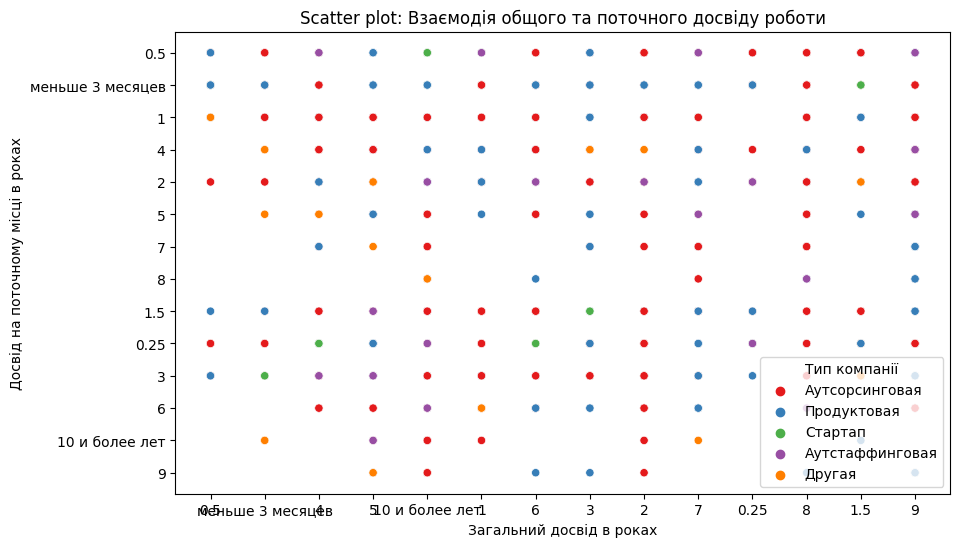

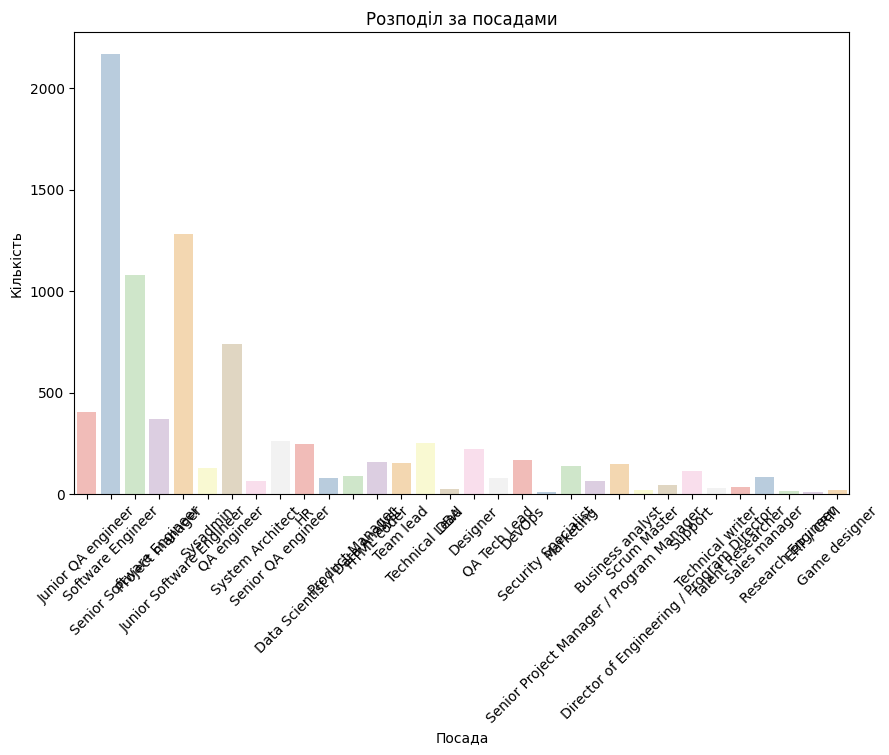

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)

# Графік 1: Histogram розподілу зарплати в місяць
plt.figure(figsize=(10, 6))
sns.histplot(df['Зарплата.в.месяц'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл зарплати в місяць')
plt.xlabel('Зарплата в місяць')
plt.ylabel('Частота')
plt.show()

# Графік 2: Box plot для розподілу зарплати за мовою програмування
plt.figure(figsize=(12, 6))
sns.boxplot(x='Язык.программирования', y='Зарплата.в.месяц', data=df, palette='Set3')
plt.title('Box plot: Зарплата за мовою програмування')
plt.xlabel('Мова програмування')
plt.ylabel('Зарплата в місяць')
plt.xticks(rotation=45)
plt.show()


# Графік 3: Line plot для динаміки зміни зарплати за 12 місяців
plt.figure(figsize=(10, 6))
sns.lineplot(x='current_job_exp', y='Изменение.зарплаты.за.12.месяцев', data=df, hue='Тип.компании', palette='Set2')
plt.title('Line plot: Зміна зарплати за 12 місяців')
plt.xlabel('Досвід в роках')
plt.ylabel('Зміна зарплати за 12 місяців')
plt.legend(title='Тип компанії')
plt.show()


# Графік 4: Scatter plot для взаємодії общого та поточного досвіду роботи
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Общий.опыт.работы', y='Опыт.работы.на.текущем.месте', data=df, hue='Тип.компании', palette='Set1')
plt.title('Scatter plot: Взаємодія общого та поточного досвіду роботи')
plt.xlabel('Загальний досвід в роках')
plt.ylabel('Досвід на поточному місці в роках')
plt.legend(title='Тип компанії')
plt.show()

# Графік 5: Count plot для розподілу за посадами
plt.figure(figsize=(10, 6))
sns.countplot(x='Должность', data=df, palette='Pastel1')
plt.title('Розподіл за посадами')
plt.xlabel('Посада')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()
